In [ ]:
# OPCJA 1:

In [ ]:
# Open cv library
import cv2

# matplotlib for displaying the images 
from matplotlib import pyplot as plt
import matplotlib.patches as patches

import random
import math
import numpy as np

img = cv2.imread('/content/img1.jpg')

def printI(img):
    fig= plt.figure(figsize=(20, 20))
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)
    
    
def printI2(i1, i2):
    fig= plt.figure(figsize=(20, 10))
    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(cv2.cvtColor(i1, cv2.COLOR_BGR2RGB))
    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(cv2.cvtColor(i2, cv2.COLOR_BGR2RGB))

In [ ]:
class Node():
    def __init__(self, x0, y0, w, h):
        self.x0 = x0
        self.y0 = y0
        self.width = w
        self.height = h
        self.children = []

    def get_width(self):
        return self.width
    
    def get_height(self):
        return self.height
    
    def get_points(self):
        return self.points
    
    def get_points(self, img):
        return img[self.x0:self.x0 + self.get_width(), self.y0:self.y0+self.get_height()]
    
    def get_error(self, img):
        pixels = self.get_points(img)
        b_avg = np.mean(pixels[:,:,0])
        b_mse = np.square(np.subtract(pixels[:,:,0], b_avg)).mean()
    
        g_avg = np.mean(pixels[:,:,1])
        g_mse = np.square(np.subtract(pixels[:,:,1], g_avg)).mean()
        
        r_avg = np.mean(pixels[:,:,2])
        r_mse = np.square(np.subtract(pixels[:,:,2], r_avg)).mean()
        
        e = r_mse * 0.2989 + g_mse * 0.5870 + b_mse * 0.1140
        
        return (e * img.shape[0]* img.shape[1])/90000000

In [ ]:
class QTree():
    def __init__(self, stdThreshold, minPixelSize, img):
        self.threshold = stdThreshold
        self.min_size = minPixelSize
        self.minPixelSize = minPixelSize
        self.img = img
        self.root = Node(0, 0, img.shape[0], img.shape[1])

    def get_points(self):
        return img[self.root.x0:self.root.x0 + self.root.get_width(), self.root.y0:self.root.y0+self.root.get_height()]
    
    def subdivide(self):
        recursive_subdivide(self.root, self.threshold, self.minPixelSize, self.img)
    
    def graph_tree(self):
        fig = plt.figure(figsize=(10, 10))
        plt.title("Quadtree")
        c = find_children(self.root)
        print("Number of segments: %d" %len(c))
        for n in c:
            plt.gcf().gca().add_patch(patches.Rectangle((n.y0, n.x0), n.height, n.width, fill=False))
        plt.gcf().gca().set_xlim(0,img.shape[1])
        plt.gcf().gca().set_ylim(img.shape[0], 0)
        plt.axis('equal')
        plt.show()
        return

    def render_img(self, thickness = 1, color = (0,0,255)):
        imgc = self.img.copy()
        c = find_children(self.root)
        for n in c:
            pixels = n.get_points(self.img)
            # grb
            gAvg = math.floor(np.mean(pixels[:,:,0]))
            rAvg = math.floor(np.mean(pixels[:,:,1]))
            bAvg = math.floor(np.mean(pixels[:,:,2]))

            imgc[n.x0:n.x0 + n.get_width(), n.y0:n.y0+n.get_height(), 0] = gAvg
            imgc[n.x0:n.x0 + n.get_width(), n.y0:n.y0+n.get_height(), 1] = rAvg
            imgc[n.x0:n.x0 + n.get_width(), n.y0:n.y0+n.get_height(), 2] = bAvg

        if thickness > 0:
            for n in c:
                # Draw a rectangle
                imgc = cv2.rectangle(imgc, (n.y0, n.x0), (n.y0+n.get_height(), n.x0+n.get_width()), color, thickness)
        return imgc

In [ ]:
def recursive_subdivide(node, k, minPixelSize, img):

    if node.get_error(img)<=k:
        return
    w_1 = int(math.floor(node.width/2))
    w_2 = int(math.ceil(node.width/2))
    h_1 = int(math.floor(node.height/2))
    h_2 = int(math.ceil(node.height/2))


    if w_1 <= minPixelSize or h_1 <= minPixelSize:
        return
    x1 = Node(node.x0, node.y0, w_1, h_1) # top left
    recursive_subdivide(x1, k, minPixelSize, img)

    x2 = Node(node.x0, node.y0+h_1, w_1, h_2) # btm left
    recursive_subdivide(x2, k, minPixelSize, img)

    x3 = Node(node.x0 + w_1, node.y0, w_2, h_1)# top right
    recursive_subdivide(x3, k, minPixelSize, img)

    x4 = Node(node.x0+w_1, node.y0+h_1, w_2, h_2) # btm right
    recursive_subdivide(x4, k, minPixelSize, img)

    node.children = [x1, x2, x3, x4]
   

def find_children(node):
   if not node.children:
       return [node]
   else:
       children = []
       for child in node.children:
           children += (find_children(child))
   return children

Number of segments: 241168


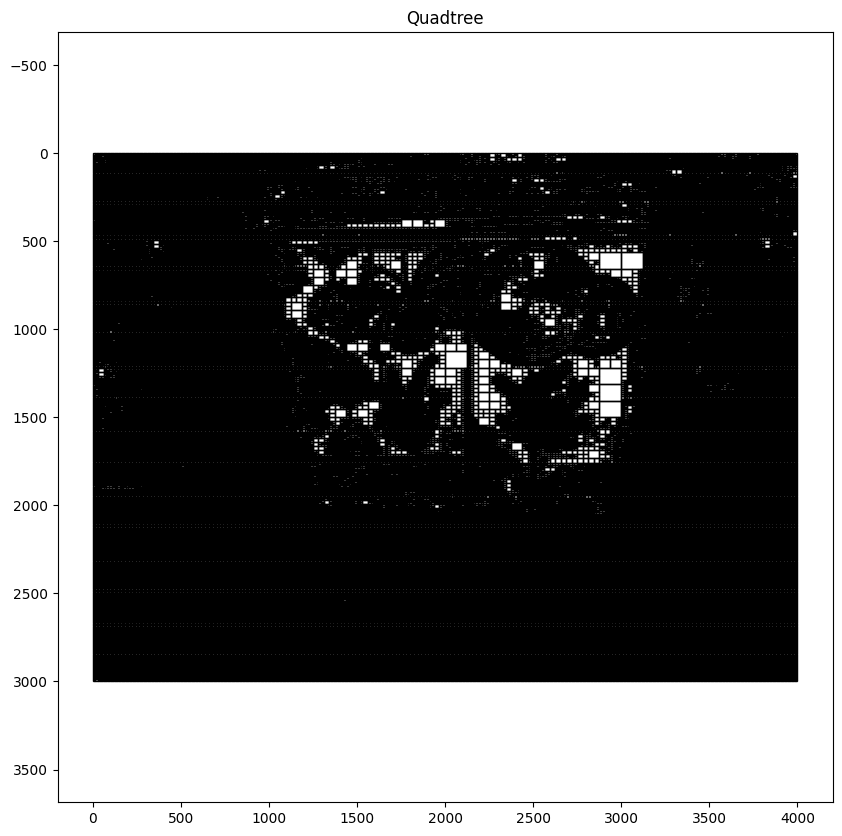

Number of segments: 184282


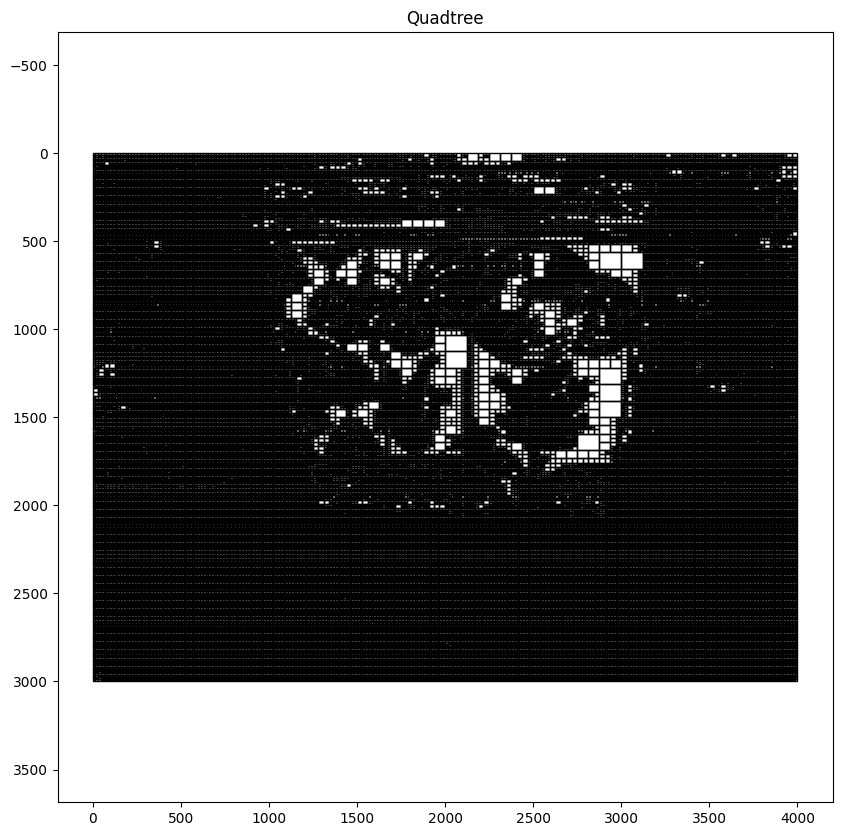

In [ ]:
qtTemp = QTree(4, 3, img)  #contrast threshold, min cell size, img
qtTemp.subdivide() # recursively generates quad tree
qtTemp.graph_tree()

qtTemp2 = QTree(9, 5, img) 
qtTemp2.subdivide()
qtTemp2.graph_tree()

In [ ]:
def concat_images(img1, img2, boarder=5, color=(255,255,255)):
    img1_boarder = cv2.copyMakeBorder(
                 img1, 
                 boarder, #top
                 boarder, #btn
                 boarder, #left
                 boarder, #right
                 cv2.BORDER_CONSTANT, 
                 value=color
              )
    img2_boarder = cv2.copyMakeBorder(
                 img2, 
                 boarder, #top
                 boarder, #btn
                 0, #left
                 boarder, #right
                 cv2.BORDER_CONSTANT, 
                 value=color
              )
    return np.concatenate((img1_boarder, img2_boarder), axis=1)

In [ ]:
def displayQuadTree(img_name, threshold=7, minCell=3, img_boarder=20, line_boarder=1, line_color=(0,0,255)):
    imgT= cv2.imread(img_name)
    qt = QTree(threshold, minCell, imgT) 
    qt.subdivide()
    qtImg= qt.render_img(thickness=line_boarder, color=line_color)
    file_name = "output/" + img_name.split("/")[-1]
    cv2.imwrite(file_name,qtImg)
    file_name_2 = "output/diptych-" + img_name[-6] + img_name[-5] + ".jpg"
    hConcat = concat_images(imgT, qtImg, boarder=img_boarder, color=(255,255,255))
    cv2.imwrite(file_name_2,hConcat)
    printI(hConcat)


In [ ]:
# displayQuadTree("/content/img1.jpg", threshold=3, img_boarder=20, line_color=(0,0,0), line_boarder = 1)

In [ ]:
# OPCJA 2:

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = mpimg.imread('/content/img1.jpg')


In [ ]:
from operator import add
from functools import reduce

def split4(image):
    half_split = np.array_split(image, 2)
    res = map(lambda x: np.array_split(x, 2, axis=1), half_split)
    return reduce(add, res)

split_img = split4(img)


In [ ]:
def concatenate4(north_west, north_east, south_west, south_east):
    top = np.concatenate((north_west, north_east), axis=1)
    bottom = np.concatenate((south_west, south_east), axis=1)
    return np.concatenate((top, bottom), axis=0)

full_img = concatenate4(split_img[0], split_img[1], split_img[2], split_img[3])


In [ ]:
def calculate_mean(img):
    return np.mean(img, axis=(0, 1))

means = np.array(list(map(lambda x: calculate_mean(x), split_img))).astype(int).reshape(2,2,3)


In [ ]:
def checkEqual(myList):
    first=myList[0]
    return all((x==first).all() for x in myList)

class QuadTree:
    
    def insert(self, img, level = 0):
        self.level = level
        self.mean = calculate_mean(img).astype(int)
        self.resolution = (img.shape[0], img.shape[1])
        self.final = True
        
        if not checkEqual(img):
            split_img = split4(img)
            
            self.final = False
            self.north_west = QuadTree().insert(split_img[0], level + 1)
            self.north_east = QuadTree().insert(split_img[1], level + 1)
            self.south_west = QuadTree().insert(split_img[2], level + 1)
            self.south_east = QuadTree().insert(split_img[3], level + 1)

        return self
    
    def get_image(self, level):
        if(self.final or self.level == level):
            return np.tile(self.mean, (self.resolution[0], self.resolution[1], 1))
        
        return concatenate4(
            self.north_west.get_image(level), 
            self.north_east.get_image(level),
            self.south_west.get_image(level),
            self.south_east.get_image(level))

In [ ]:
quadtree = QuadTree().insert(img)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [ ]:
# plt.imshow(quadtree.get_image(8))
# plt.show()